In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Verify the mounted path
!ls /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 2021IMT_093_DAA_Assignment2.gdoc
 2021IMT_093_DAA_Assignment2.pdf
 2021_IMT_093_DAA_ASSIGNMENT.pdf
 2021_IMT_093_Shouvik_Dey_MCom_Lab_04.gdoc
 2021-IMT-Sem-2
 20241216_150133.jpg
 Analysis_for_unknowns1.gdoc
 ASol_English-Language-27-02-2023_CBSE-X.pdf
'Beginning Data Science in R_ Data Analysis, Visualization, and Modelling for the Data Scientist ( PDFDrive ).pdf'
'Benchmark Datasets Prompting.gdoc'
 BirdCLEF_Docs.gdoc
 BITSAT
 CC1.gslides
 CC2.gslides
 CC_Lab_Assignment_6_IMT_2021093.gdoc
 ch04.gdoc
 Classroom
 Clg_Docs
 client.py
 Colab
'Colab Notebooks'
 Comprehensive_AI_Powered_Optimum_Farming_Toolkit.pdf
'Copy of negative-words.txt'
'Cover letter for Co-op Intern role at Zendesk.gdoc'
 Cover_Letter_Mastercard.gdoc
 Cover_Letter_Shouvik_Dey.gdoc
 credit_card_fault_dataset.csv
 Deep_Dive_Labs
'Deep Dive Labs Internal Completeness and Relevancy Rubric Pro

In [ ]:
!pip install h5py tensorflow numpy matplotlib

In [ ]:
import h5py

file_path = '/content/drive/MyDrive/quark-gluon_data-set_n139306.hdf5'

# Step 1: Check if the file can be opened
try:
    with h5py.File(file_path, 'r') as f:
        print("File opened successfully.")
except Exception as e:
    print("Error opening file:", e)

# Step 2: List top-level keys
try:
    with h5py.File(file_path, 'r') as f:
        print("Top-level keys:", list(f.keys()))
except Exception as e:
    print("Error listing keys:", e)

# Step 3: Try accessing a specific dataset
try:
    with h5py.File(file_path, 'r') as f:
        if 'X_jets' in f:
            print("Shape of X_jets:", f['X_jets'].shape)
        else:
            print("X_jets not found in the file.")
except Exception as e:
    print("Error accessing dataset:", e)

File opened successfully.
Top-level keys: ['X_jets', 'm0', 'pt', 'y']
Shape of X_jets: (139306, 125, 125, 3)


In [ ]:
# !apt-get install h5utils

In [ ]:
# !pip install --upgrade h5py

## Analysis and Viz

In [ ]:
# !h5repack /content/quark-gluon_data-set_n139306.hdf5 /content/quark-gluon_data-set_n139306_repacked.hdf5

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize variables to None to avoid NameError if they are not assigned in the try block
X_jets = None
m0 = None
pt = None
y = None

# Load and inspect the dataset with try-except handling
try:
    with h5py.File(file_path, 'r') as f:
        print("File opened successfully.")

        # Lazy loading by accessing only a slice of the data
        batch_size = 1000  # Load in batches of 1000
        X_jets = f['X_jets'][:batch_size]  # Load first batch
        m0 = f['m0'][:batch_size]
        pt = f['pt'][:batch_size]
        y = f['y'][:batch_size]

        print("\nDataset Overview (Partial Load):")
        print(f"X_jets shape: {X_jets.shape}")
        print(f"m0 shape: {m0.shape}")
        print(f"pt shape: {pt.shape}")
        print(f"y shape: {y.shape}")

except Exception as e:
    print("Error:", e)

print("\nDataset Overview:")
# Check if variables were assigned before printing their shapes
print(f"m0 (labels) shape: {m0.shape if m0 is not None else 'Not loaded'}")
print(f"pt (momentum) shape: {pt.shape if pt is not None else 'Not loaded'}")
print(f"y (rapidity) shape: {y.shape if y is not None else 'Not loaded'}")
print(f"X_jets shape: {X_jets.shape if X_jets is not None else 'Not loaded'}")

File opened successfully.

Dataset Overview (Partial Load):
X_jets shape: (1000, 125, 125, 3)
m0 shape: (1000,)
pt shape: (1000,)
y shape: (1000,)

Dataset Overview:
m0 (labels) shape: (1000,)
pt (momentum) shape: (1000,)
y (rapidity) shape: (1000,)
X_jets shape: (1000, 125, 125, 3)


In [ ]:
# 1. Check the file integrity
# !h5stat /content/quark-gluon_data-set_n139306.hdf5

In [ ]:
# !h5repack /content/quark-gluon_data-set_n139306.hdf5 /content/repaired_file.hdf5

In [ ]:
# y

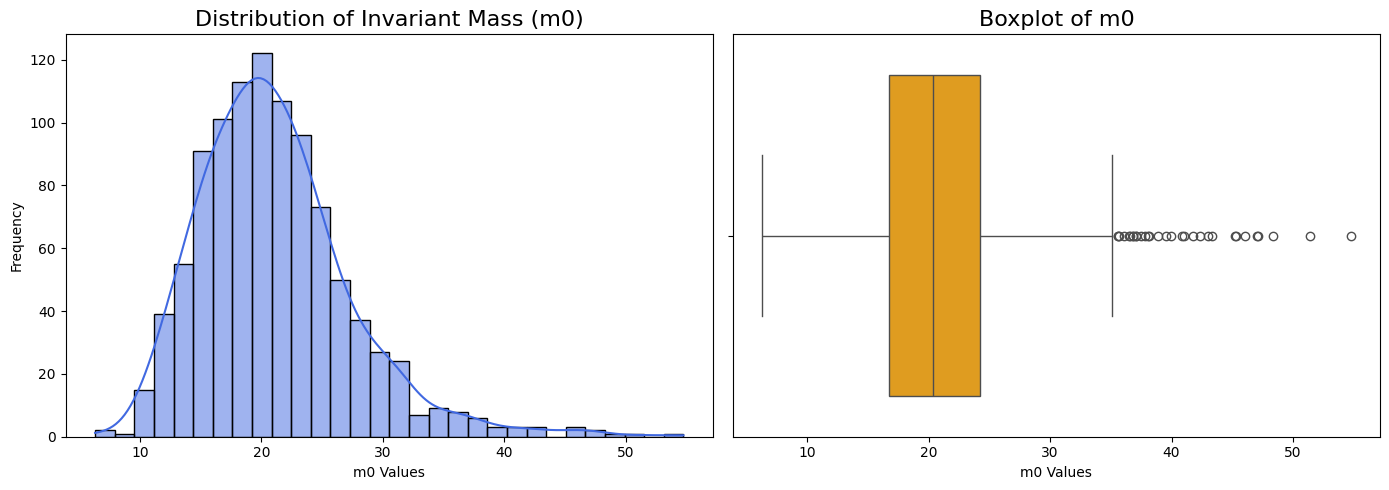

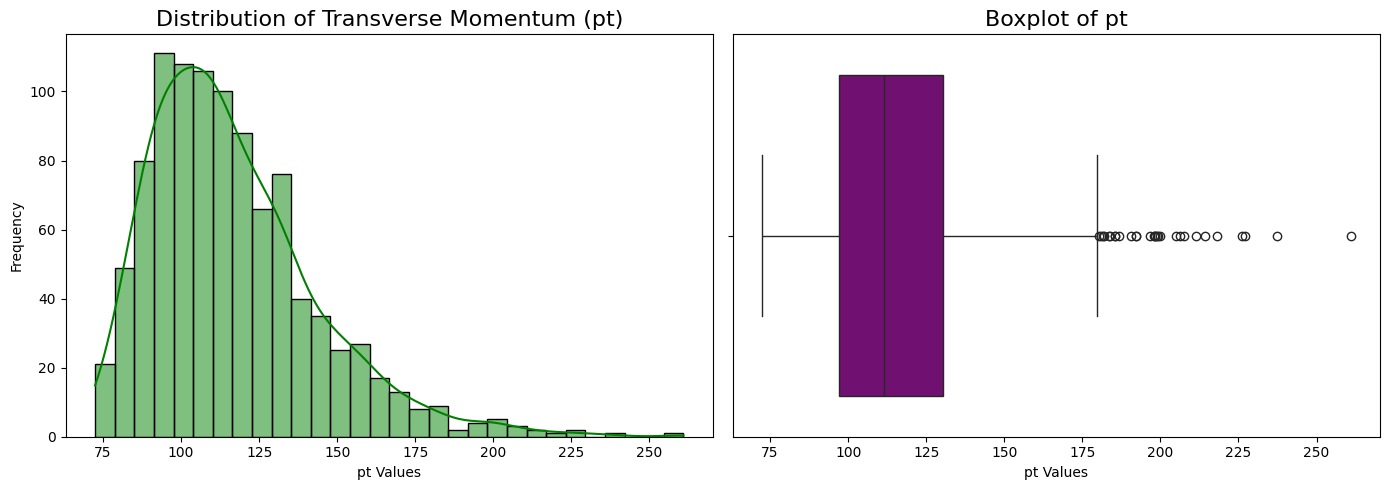

<ipython-input-9-47736b8d573b>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel', ax=axes[0])


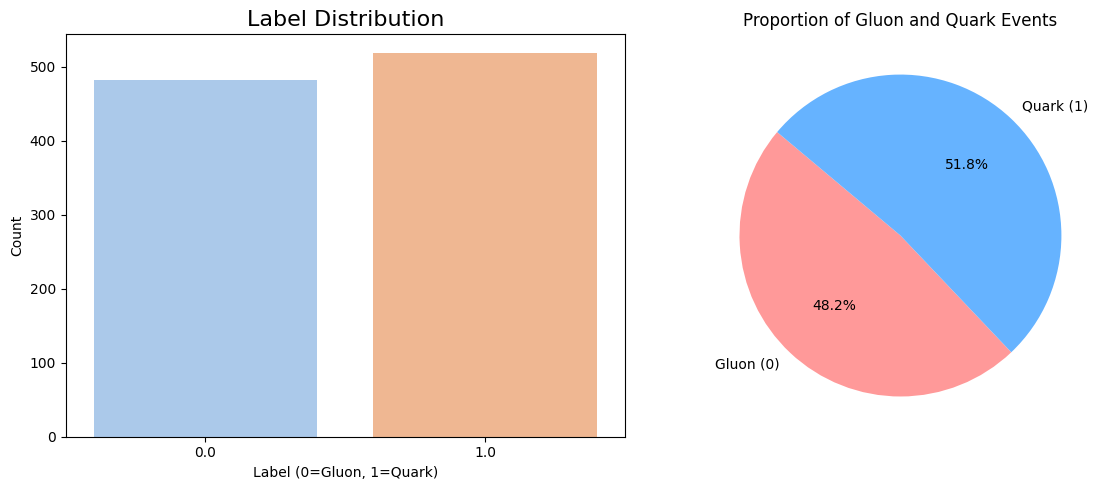

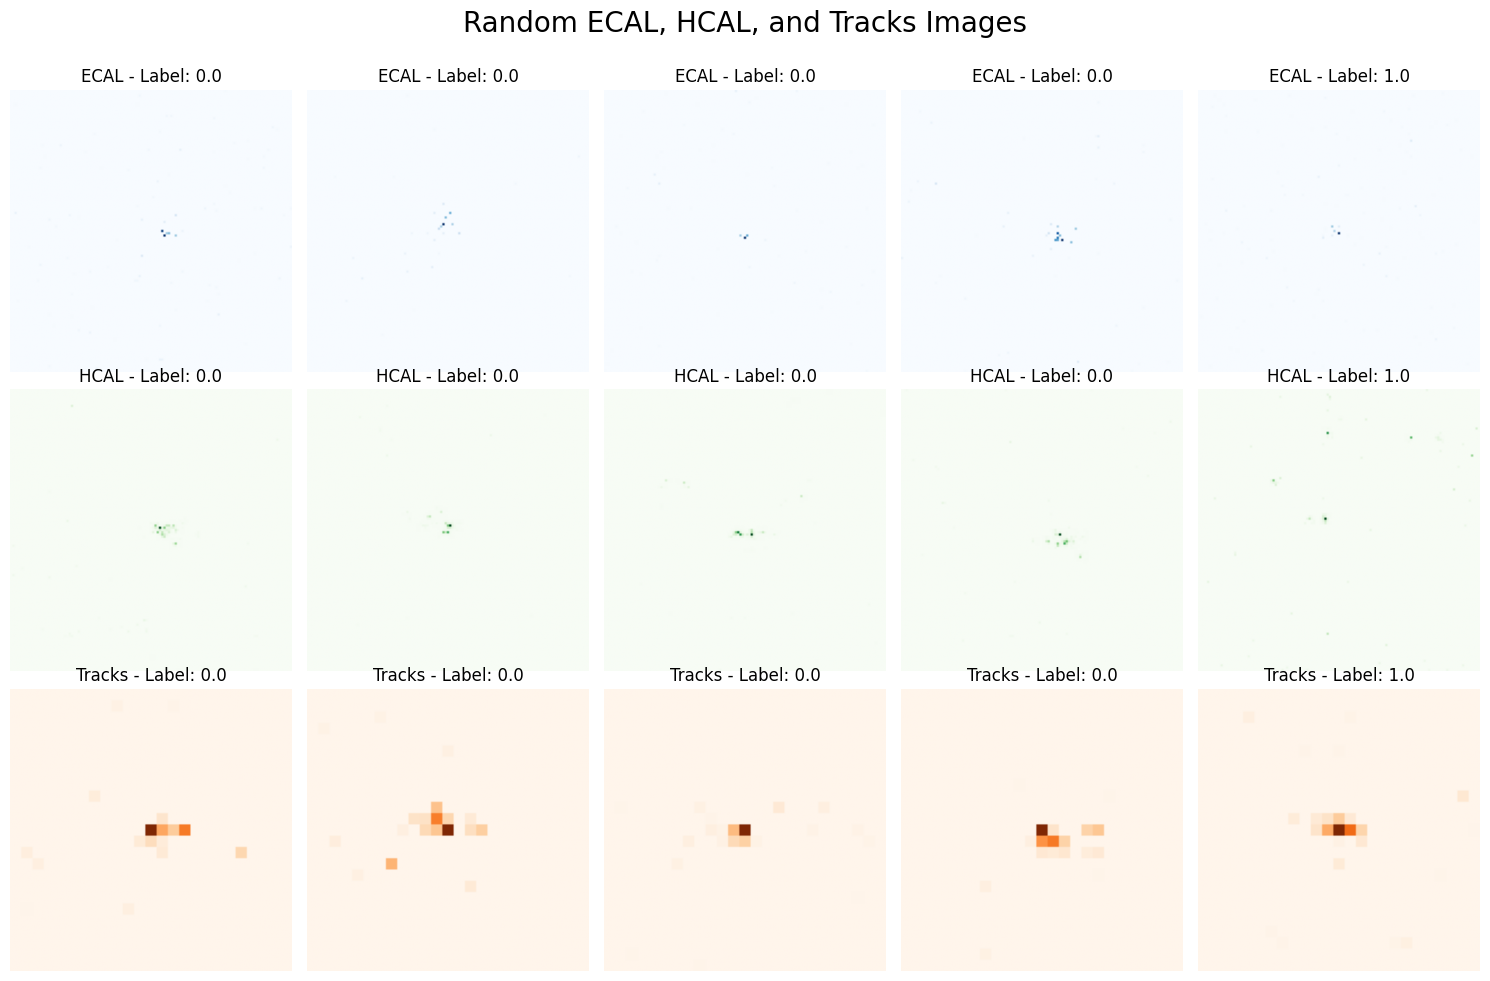

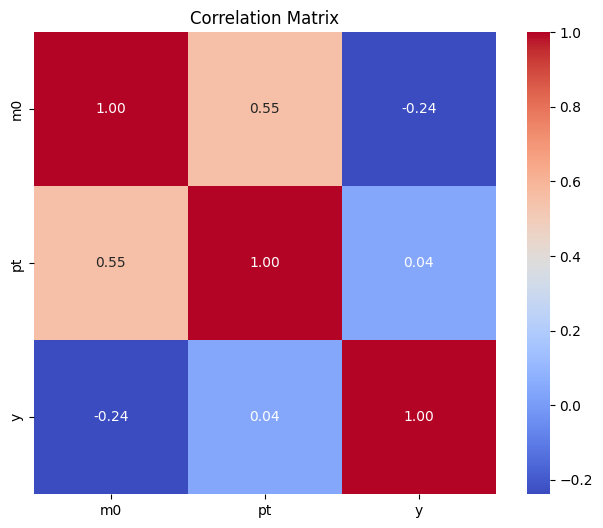

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ✅ Sample Data
# m0, pt, X_jets (1000, 125, 125, 3), and y
np.random.seed(42)  # For reproducibility

# 🔥 1. **Distribution of m0**
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(m0, kde=True, color='royalblue', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Invariant Mass (m0)', fontsize=16)
axes[0].set_xlabel('m0 Values')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=m0, color='orange', ax=axes[1])
axes[1].set_title('Boxplot of m0', fontsize=16)
axes[1].set_xlabel('m0 Values')

plt.tight_layout()
plt.show()


# 🔥 2. **Distribution of pt**
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
sns.histplot(pt, kde=True, color='green', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Transverse Momentum (pt)', fontsize=16)
axes[0].set_xlabel('pt Values')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=pt, color='purple', ax=axes[1])
axes[1].set_title('Boxplot of pt', fontsize=16)
axes[1].set_xlabel('pt Values')

plt.tight_layout()
plt.show()


# 🔥 3. **Label Distribution (y)**
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.countplot(x=y, palette='pastel', ax=axes[0])
axes[0].set_title('Label Distribution', fontsize=16)
axes[0].set_xlabel('Label (0=Gluon, 1=Quark)')
axes[0].set_ylabel('Count')

# Pie chart
labels = ['Gluon (0)', 'Quark (1)']
sizes = [np.sum(y == 0), np.sum(y == 1)]
colors = ['#ff9999', '#66b3ff']
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Proportion of Gluon and Quark Events')

plt.tight_layout()
plt.show()


# 🔥 4. **Visualizing ECAL, HCAL, and Tracks**
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Random ECAL, HCAL, and Tracks Images', fontsize=20)

for i in range(5):
    idx = np.random.randint(0, len(X_jets))

    # ECAL (Channel 0)
    axes[0, i].imshow(X_jets[idx, :, :, 0], cmap='Blues')
    axes[0, i].set_title(f'ECAL - Label: {y[idx]}')
    axes[0, i].axis('off')

    # HCAL (Channel 1)
    axes[1, i].imshow(X_jets[idx, :, :, 1], cmap='Greens')
    axes[1, i].set_title(f'HCAL - Label: {y[idx]}')
    axes[1, i].axis('off')

    # Tracks (Channel 2)
    axes[2, i].imshow(X_jets[idx, :, :, 2], cmap='Oranges')
    axes[2, i].set_title(f'Tracks - Label: {y[idx]}')
    axes[2, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# 🔥 5. **Correlation Analysis**
# Create dataframe for correlation
data = {
    'm0': m0,
    'pt': pt,
    'y': y
}
df = pd.DataFrame(data)

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# ✅ Google Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

# ✅ File Paths
file_path = '/content/drive/MyDrive/quark-gluon_data-set_n139306.hdf5'
save_dir = '/content/drive/MyDrive/QuarkGluonBatches/'  # Storage location

# ✅ Ensure save directory exists
os.makedirs(save_dir, exist_ok=True)

class QuarkGluonImageLoader:
    def __init__(self, file_path, batch_size=1000, save_dir=save_dir):
        """
        Initialize the dataset loader with lazy loading and Google Drive saving.
        """
        self.file_path = file_path
        self.batch_size = batch_size
        self.save_dir = save_dir
        self.total_samples = 0

        # Open the HDF5 file
        with h5py.File(file_path, 'r') as f:
            self.total_samples = f['X_jets'].shape[0]  # Number of samples
            print(f"Total samples: {self.total_samples}")

    def save_batch(self, batch_idx, X_batch):
        """
        Save the raw batch (unprocessed) as .npy files in Google Drive.
        """
        np.save(os.path.join(self.save_dir, f'X_batch_{batch_idx}.npy'), X_batch)
        print(f"✅ Saved Batch {batch_idx} to Google Drive")

    def get_last_saved_batch(self):
        """
        Check Google Drive for the last saved batch index.
        """
        existing_batches = [
            int(fname.split('_')[2].split('.')[0])
            for fname in os.listdir(self.save_dir) if fname.startswith('X_batch_')
        ]

        if existing_batches:
            last_batch = max(existing_batches)
            print(f"🔄 Resuming from batch {last_batch + 1}")
            return last_batch + 1
        else:
            print("🚀 Starting from the beginning.")
            return 0

    def __iter__(self):
        """
        Iterate through the dataset in batches with lazy loading and resume from last batch.
        """
        start_batch = self.get_last_saved_batch()

        with h5py.File(self.file_path, 'r') as f:
            for batch_idx, start in enumerate(range(0, self.total_samples, self.batch_size)):
                # Resume from the last saved batch
                if batch_idx < start_batch:
                    continue

                end = min(start + self.batch_size, self.total_samples)

                # Load raw batch (unprocessed images)
                raw_batch = f['X_jets'][start:end]  # No preprocessing

                # Save the raw batch to Google Drive
                self.save_batch(batch_idx, raw_batch)

                # Preprocess only for training
                preprocessed_batch = raw_batch / 255.0
                yield raw_batch, preprocessed_batch

# ✅ **Usage**
batch_size = 2000

# Instantiate the loader
loader = QuarkGluonImageLoader(file_path, batch_size=batch_size)

# Iterate through batches with lazy loading and img/255.0 normalization
for i, (raw_batch, preprocessed_batch) in enumerate(loader):
    print(f"\nBatch {i+1}:")
    print(f"Raw batch shape: {raw_batch.shape}")
    print(f"Preprocessed batch shape: {preprocessed_batch.shape}")

    # Display raw and preprocessed images for the first batch
    if i == 0:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Display raw image
        axes[0].imshow(raw_batch[0] / 255.0)
        axes[0].set_title('Raw Image')
        axes[0].axis('off')

        # Display preprocessed image
        axes[1].imshow(preprocessed_batch[0])
        axes[1].set_title('Preprocessed (img/255.0)')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.mixed_precision import set_global_policy

# ✅ Enable mixed precision training
set_global_policy('mixed_float16')

# ✅ Google Drive path
GDRIVE_PATH = '/content/drive/My Drive/QuarkGluonBatches/'

# ✅ Parameters
BATCH_SIZE = 256  # Reduced batch size to prevent memory exhaustion
IMG_SHAPE = (125, 125, 3)

# ✅ Remove double normalization
def create_dataset(folder_path, batch_size, img_shape):
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.npy')]

    def load_and_slice(file_path):
        large_batch = np.load(file_path)  # Load the entire batch
        num_slices = large_batch.shape[0] // batch_size

        for i in range(num_slices):
            batch_slice = large_batch[i * batch_size:(i + 1) * batch_size]

            # Remove second normalization (no need to divide by 255 again)
            preprocessed_batch = batch_slice / 255.0  # Normalize only once

            yield batch_slice, preprocessed_batch

    def generator():
        for path in file_paths:
            for raw, preprocessed in load_and_slice(path):
                yield raw, preprocessed

    output_signature = (
        tf.TensorSpec(shape=(batch_size, *img_shape), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size, *img_shape), dtype=tf.float32)
    )

    dataset = tf.data.Dataset.from_generator(generator, output_signature=output_signature)
    dataset = dataset.shuffle(len(file_paths))
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset


# ✅ Create the dataset
dataset = create_dataset(GDRIVE_PATH, BATCH_SIZE, IMG_SHAPE)

# ✅ Autoencoder Model with Bottleneck
def build_autoencoder(input_shape):
    encoder_input = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(encoder_input)
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)

    # Bottleneck
    x = layers.Flatten()(x)
    bottleneck = layers.Dense(256, activation='relu')(x)

    # Decoder
    x = layers.Dense(16 * 16 * 128, activation='relu')(bottleneck)
    x = layers.Reshape((16, 16, 128))(x)
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

    # Ensure output matches input size
    decoder_output = layers.Cropping2D(cropping=((1, 2), (1, 2)))(x)

    autoencoder = models.Model(inputs=encoder_input, outputs=decoder_output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    return autoencoder

# ✅ Instantiate the autoencoder
autoencoder = build_autoencoder(IMG_SHAPE)

In [ ]:
# ✅ Use model.fit() for efficient memory usage
steps_per_epoch = len(os.listdir(GDRIVE_PATH)) * (2000 // BATCH_SIZE) // 4

# ✅ Callbacks for early stopping and model checkpointing
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint(
    os.path.join(GDRIVE_PATH, 'best_autoencoder_model2.keras'),
    monitor='loss',
    save_best_only=True
)

# ✅ Train the model with callbacks
autoencoder.fit(
    dataset,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    callbacks=[early_stopping, model_checkpoint]
)

# ✅ Save the final model
model_save_path = os.path.join(GDRIVE_PATH, 'autoencoder_model_final2.keras')
autoencoder.save(model_save_path)
print(f"Final model saved at {model_save_path}")

Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - loss: 0.2393
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - loss: 3.3077e-07
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - loss: 1.4318e-07
Epoch 4/30
107/127 ━━━━━━━━━━━━━━━━━━━━ 16s 806ms/step - loss: 1.2635e-07

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


127/127 ━━━━━━━━━━━━━━━━━━━━ 88s 698ms/step - loss: 1.2593e-07
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - loss: 1.1543e-07
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - loss: 1.0367e-07
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - loss: 9.8274e-08
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 106s 840ms/step - loss: 9.2539e-08
Epoch 9/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - loss: 7.7486e-08
Epoch 10/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - loss: 7.0428e-08
Epoch 11/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - loss: 6.5624e-08
Epoch 12/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 112s 884ms/step - loss: 6.0784e-08
Epoch 13/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - loss: 5.4898e-08
Epoch 14/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - loss: 5.1004e-08
Epoch 15/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 388s 3s/step - loss: 5.0746e-08
Epoch 16/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 742ms/step - loss: 4.3905e-08
Epoch 17/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - lo

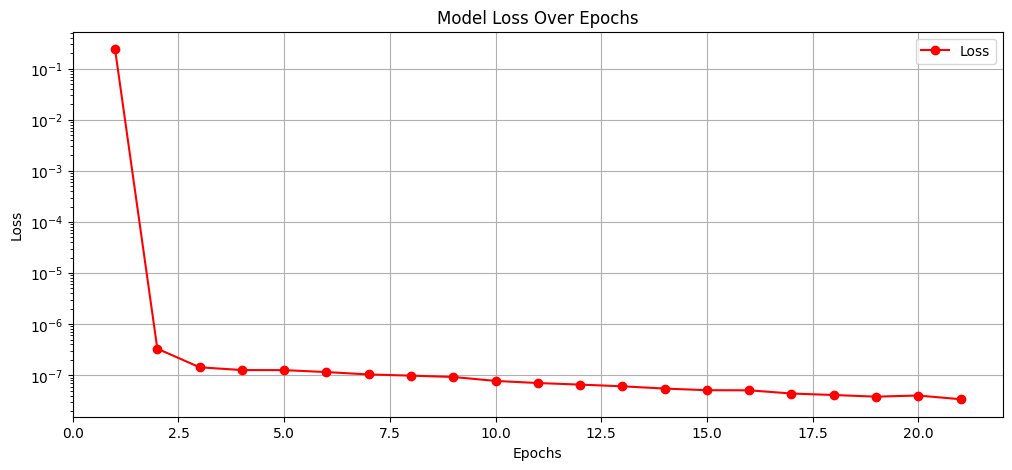

In [ ]:
import matplotlib.pyplot as plt

# ✅ Epochs
epochs = list(range(1, len(loss) + 1))

# ✅ Plotting
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, marker='o', color='red', label='Loss')

# ✅ Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.yscale('log')
plt.legend()
plt.grid(True)

# ✅ Show Plot
plt.show()

In [ ]:
# ✅ Recreate the dataset before visualization if running separately
GDRIVE_PATH = '/content/drive/My Drive/QuarkGluonBatches/'
BATCH_SIZE = 256
IMG_SHAPE = (125, 125, 3)

# ✅ Create the dataset
dataset = create_dataset(GDRIVE_PATH, BATCH_SIZE, IMG_SHAPE)

Loading saved model from /content/drive/My Drive/QuarkGluonBatches/best_autoencoder_model2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


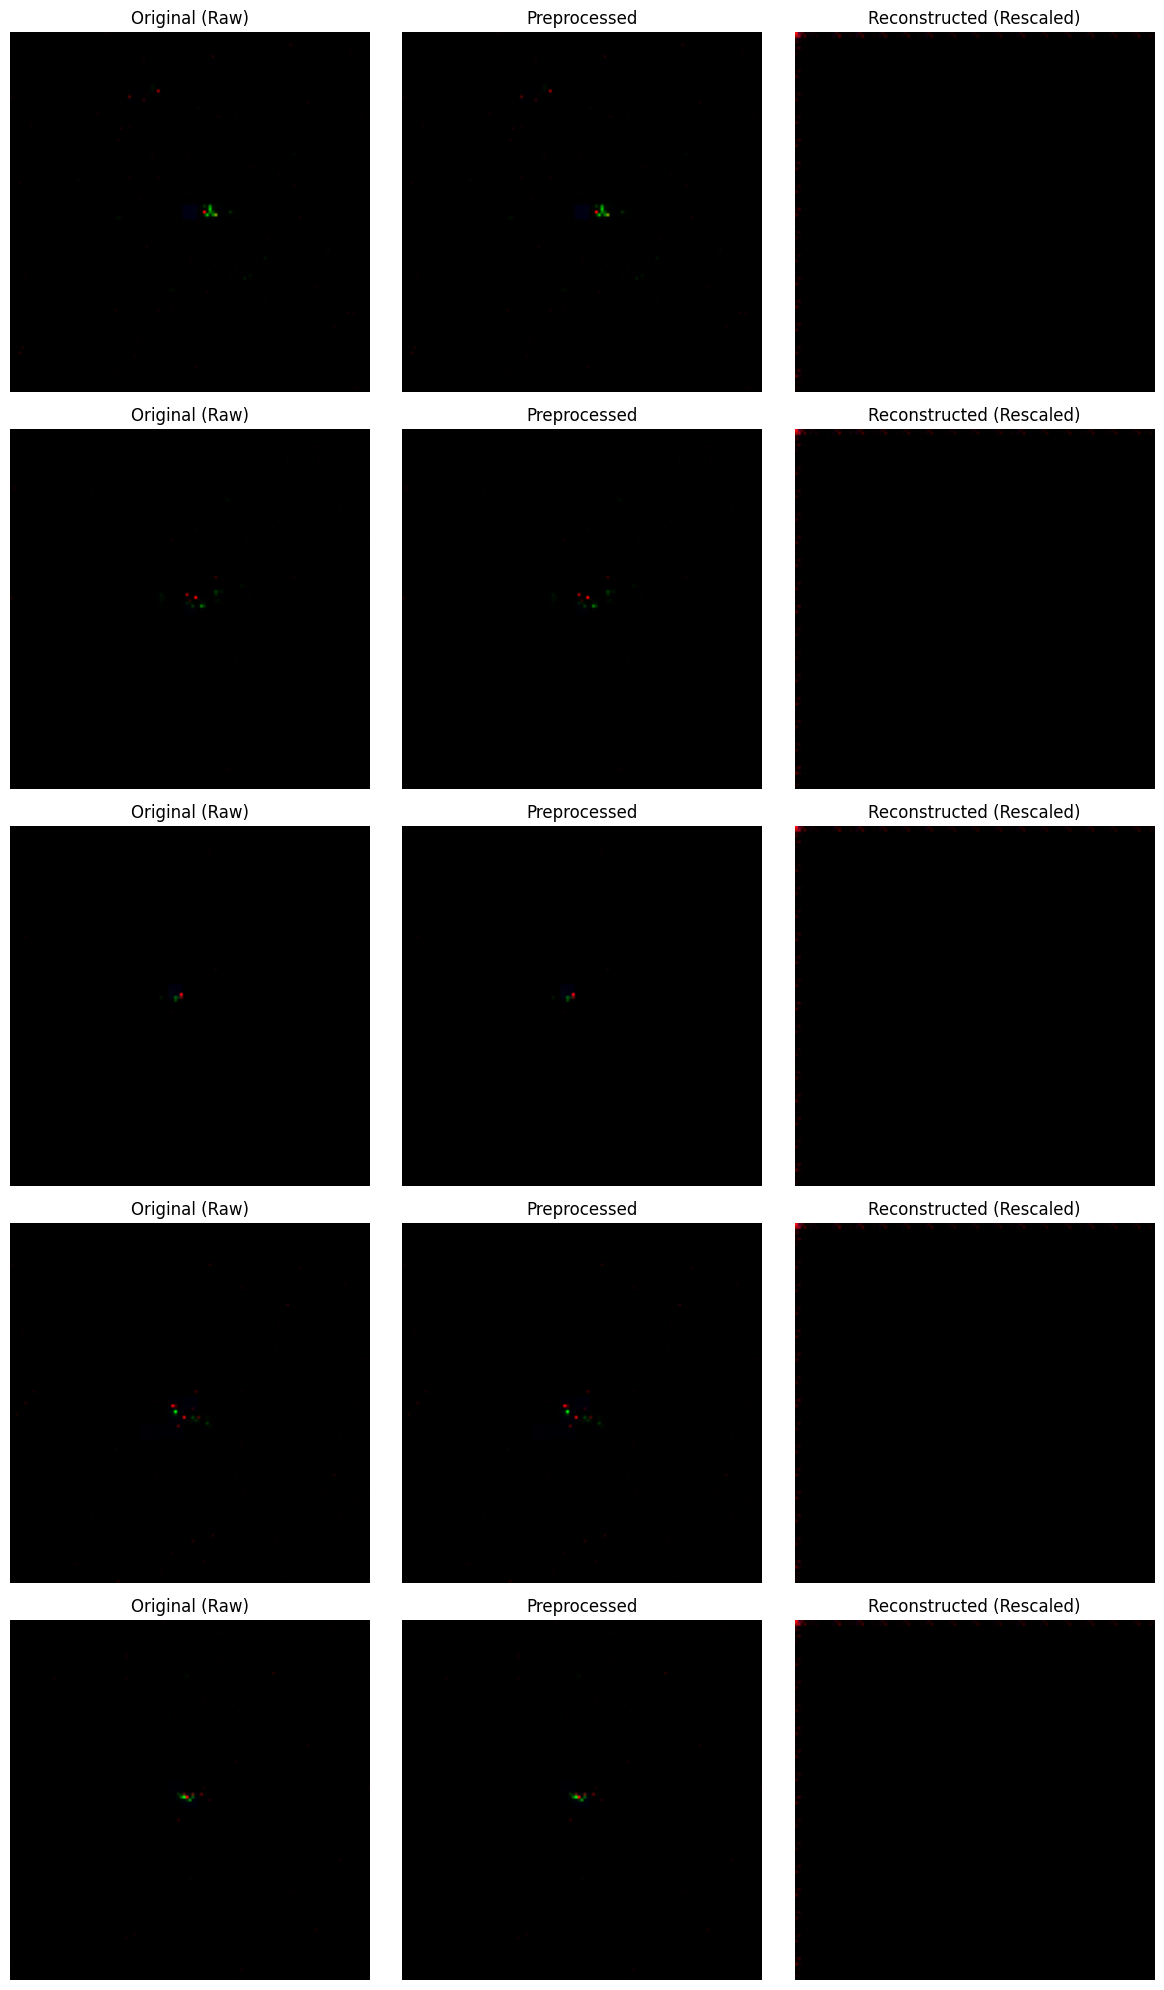

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# ✅ Path to the saved model
MODEL_PATH = '/content/drive/My Drive/QuarkGluonBatches/best_autoencoder_model2.keras'

# ✅ Load the final model if it exists
if os.path.exists(MODEL_PATH):
    print(f"Loading saved model from {MODEL_PATH}")
    autoencoder = tf.keras.models.load_model(MODEL_PATH)
else:
    print("No saved model found. Using the current model in memory.")

# ✅ Visualization with rescaling
def visualize_comparison(model, dataset, num_samples=5):
    for raw_batch, preprocessed_batch in dataset.take(1):
        reconstructed = model.predict(preprocessed_batch[:num_samples])

    # ✅ Rescale for better visualization
    raw_batch = raw_batch[:num_samples].numpy().astype(np.float32)
    preprocessed_batch = preprocessed_batch[:num_samples].numpy().astype(np.float32)
    reconstructed_rescaled = (reconstructed / np.max(reconstructed)) * 255.0  # Rescale
    reconstructed_rescaled = reconstructed_rescaled.astype(np.uint8)

    # ✅ Plot the original, preprocessed, and reconstructed images side by side
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))

    for i in range(num_samples):
        # Original image (raw)
        axes[i, 0].imshow(raw_batch[i] / np.max(raw_batch[i]))  # Normalize raw image
        axes[i, 0].set_title('Original (Raw)')
        axes[i, 0].axis('off')

        # Preprocessed image
        axes[i, 1].imshow(preprocessed_batch[i] / np.max(preprocessed_batch[i]))  # Normalize preprocessed
        axes[i, 1].set_title('Preprocessed')
        axes[i, 1].axis('off')

        # Reconstructed image
        axes[i, 2].imshow(reconstructed_rescaled[i])
        axes[i, 2].set_title('Reconstructed (Rescaled)')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

# ✅ Call the visualization function
visualize_comparison(autoencoder, dataset)